In [1]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [1]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
a = np.zeros([3, 2])
print(a)

[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]


In [41]:
a[0, 0] = 1
a[0, 1] = 2
a[1, 0] = 9
a[2, 1] = 12
print(a[0, 0])

NameError: name 'a' is not defined

In [40]:
#le dices a python que no lo abra en una nueva ventana
plt.imshow(a, interpolation="nearest")

NameError: name 'a' is not defined

In [9]:
class Dog:
    def __init__(self, petname, temp):
        self.name = petname
        self.temperature = temp
        
    def status(self):
        print("dog name is ", self.name)
        print("dog temperature is ", self.temperature)
        
    def setTemperature(self, temp):
        self.temperature = temp
    
    def bark(self):
        print("woof!!")
        pass
    

In [10]:
sis = Dog("Miguelon", 12)
sis.bark()
sis.status()
sis.setTemperature(32)
sis.status()

woof!!
dog name is  Miguelon
dog temperature is  12
dog name is  Miguelon
dog temperature is  32


In [2]:
class neuralNetwork:
    #initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate ):
        #set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        #learning rate
        self.lr = learningrate
        #weights
        self.wih = np.random.normal (0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal (0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        #sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        pass
    #train the neural network
    def train(self, inputs_list, targets_list):
        #convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin= 2).T
        targets = np.array(targets_list, ndmin=2).T
        #calculating signals into hidden_layer
        hidden_inputs = np.dot(self.wih, inputs)
        #calculating the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        ##calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        #calculate the signals emerging from the final output layer
        final_outputs = self.activation_function(final_inputs)
        
        #calculating the error
        output_errors = targets - final_outputs
        #split the errors
        hidden_errors = np.dot(self.who.T, output_errors)
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
        pass
    
    #query the neural network
    def query(self, inputs_list):
        #convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin= 2).T
        
        #calculating signals into hidden_layer
        hidden_inputs = np.dot(self.wih, inputs)
        #calculating the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        ##calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        #calculate the signals emerging from the final output layer
        final_outputs = self.activation_function(final_inputs)
        return final_outputs
    
    def noSirve(self, lol):
        print(lol)
    

In [13]:
#number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
#learning rate is 0.3
learning_rate = 0.3
#create instance of neural network
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

#load the mnist training data csv file into a list
training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines() 
#no lo lee en memoria
training_data_file.close()

#training the neural network

#go throught all records in the training data set
for record in training_data_list:
    #split the record by the , commas
    all_values = record.split(',')
    #scale and shift inputs
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    #create the target output values (all 0.01 except the corect value .99)
    targets = np.zeros(output_nodes) + 0.01
    #all_values[0] is the target value for all records
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    pass

In [9]:
oxlack = np.array([[1, 2, 3, 4], [3, 4, 5, 6]])
print(oxlack)
#ndmin es un reshape para ponerlo todo en una sola fila
oxl = np.array(oxlack, ndmin=2).T
print(oxl)

[[1 2 3 4]
 [3 4 5 6]]
[[1 3]
 [2 4]
 [3 5]
 [4 6]]


In [34]:
n.query([1, 2, 3])

array([[ 0.70113961],
       [ 0.44751754],
       [ 0.38705631]])

In [68]:
#load the mnist training data csv file into a list
training_data_file = open("mnist_dataset/mnist_test.csv", 'r')
training_data_list = training_data_file.readlines() #no lo lee en memoria
training_data_file.close()

In [72]:
#get the first record
all_values = training_data_list[1].split(',')
print(all_values[0])

2


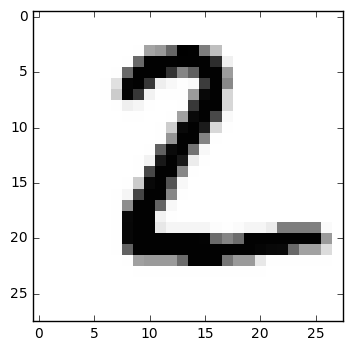

In [73]:
image_array = np.asfarray(all_values[1:]).reshape((28, 28))
plt.imshow(image_array, cmap='Greys', interpolation='None')

In [74]:
n.query(np.asfarray(all_values[1:]) / 255.0 * 0.99 + 0.01)

array([[ 0.19153168],
       [ 0.0547648 ],
       [ 0.36879638],
       [ 0.13295093],
       [ 0.00114425],
       [ 0.04402366],
       [ 0.38700412],
       [ 0.01791788],
       [ 0.06631347],
       [ 0.00626649]])

In [16]:
#load the mnist training data csv file into a list
test_data_file = open("mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines() 
#no lo lee en memoria
test_data_file.close()
#test the neural network
scorecard = []
#go throught all the records in the dataset
for record in test_data_list:
    #split the record by the ',' commas
    all_values = record.split(',')
    #correct first v alue
    correct_value = int(all_values[0])
    print("correct_value: ", correct_value)
    #scale and shift the outputs
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    #query the netwprk
    outputs = n.query(inputs)
    #the index of the higest value corresponds to the label
    label = np.argmax(outputs)
    print(label, "Networks answer")
    #append correct or incorrect answer
    if(label == correct_value):
        #if is correct, append 1
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass
    

correct_value:  7
7 Networks answer
correct_value:  2
2 Networks answer
correct_value:  1
1 Networks answer
correct_value:  0
0 Networks answer
correct_value:  4
4 Networks answer
correct_value:  1
1 Networks answer
correct_value:  4
4 Networks answer
correct_value:  9
9 Networks answer
correct_value:  5
6 Networks answer
correct_value:  9
9 Networks answer
correct_value:  0
0 Networks answer
correct_value:  6
6 Networks answer
correct_value:  9
9 Networks answer
correct_value:  0
0 Networks answer
correct_value:  1
1 Networks answer
correct_value:  5
5 Networks answer
correct_value:  9
9 Networks answer
correct_value:  7
7 Networks answer
correct_value:  3
3 Networks answer
correct_value:  4
4 Networks answer
correct_value:  9
9 Networks answer
correct_value:  6
6 Networks answer
correct_value:  6
6 Networks answer
correct_value:  5
5 Networks answer
correct_value:  4
4 Networks answer
correct_value:  0
0 Networks answer
correct_value:  7
7 Networks answer
correct_value:  4
4 Networks

In [17]:
print(scorecard)
#calculate the performance score
scorecard_array = np.asarray(scorecard)
print("performance = ", scorecard_array.sum()/scorecard_array.size)

[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [19]:
#limit a learning capacity
#the network is able to give really good results with so few hidden nodes
#changid the shape of the network from 100 to 500, but the computer need to resist that
#more epochs, less learning rate
#number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10
#learning rate is 0.1
learning_rate = 0.1
#create instance of neural network
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

#load the mnist training data csv file into a list
training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines() 
#no lo lee en memoria
training_data_file.close()
#this is other training cell
#epoch is the number of times the training data set is used for trraining
epochs = 2
for e in range(epochs):
    #go throught all records in training list
    for record in training_data_list:
        #split the record by the , commas
        all_values = record.split(',')
        #scale and shift inputs
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        #create the target output values (all 0.01 except the corect value .99)
        targets = np.zeros(output_nodes) + 0.01
        #all_values[0] is the target value for all records
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
pass